In [1]:
import config
import torch
import numpy as np
import torch_model
from sklearn.neighbors import NearestNeighbors
import torchvision.transforms as T
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_image_tensor(image_path, device):
    image_tensor = T.ToTensor()(Image.open(image_path))
    image_tensor = image_tensor.unsqueeze(0)
    print(image_tensor.shape)
    # input_images = image_tensor.to(device)
    return image_tensor

In [3]:
def compute_similar_images(image_path, num_images, embedding, device):
    image_tensor = load_image_tensor(image_path, device)
    # image_tensor = image_tensor.to(device)

    with torch.no_grad():
        image_embedding = encoder(image_tensor).cpu().detach().numpy()

    print(image_embedding.shape)

    flattened_embedding = image_embedding.reshape((image_embedding.shape[0], -1))
    print(flattened_embedding.shape)

    knn = NearestNeighbors(n_neighbors=num_images, metric="cosine")
    knn.fit(embedding)

    _, indices = knn.kneighbors(flattened_embedding)
    indices_list = indices.tolist()
    print(indices_list)
    return indices_list


In [4]:
def plot_similar_images(indices_list):
    indices = indices_list[0]
    for index in indices:
        img_name = str(index - 1) + ".jpg"
        img_path = os.path.join(config.DATA_PATH + img_name)
        print(img_path)
        img = Image.open(img_path).convert("RGB")
        plt.imshow(img)
        plt.show()

In [5]:
TEST_IMAGE_PATH = "../data/images/4625.jpg"
NUM_IMAGES = 10
ENCODER_MODEL_PATH = "../data/models/deep_encoder.pt"
EMBEDDING_PATH = "../data/models/data_embedding_f.npy"

torch.Size([1, 3, 512, 512])
(1, 256, 16, 16)
(1, 65536)
[[1345, 246, 4048, 2262, 195, 3200, 2968, 1787, 4090, 771]]
../data/images/1344.jpg


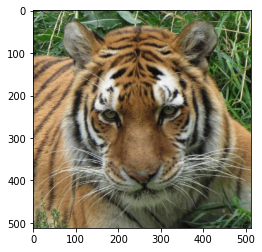

../data/images/245.jpg


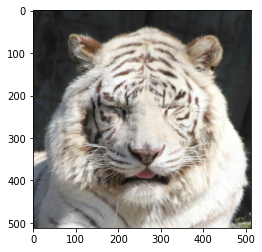

../data/images/4047.jpg


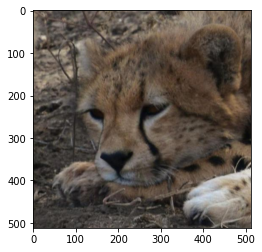

../data/images/2261.jpg


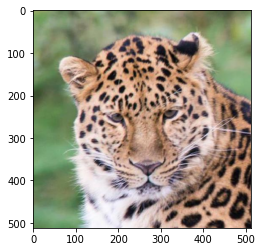

../data/images/194.jpg


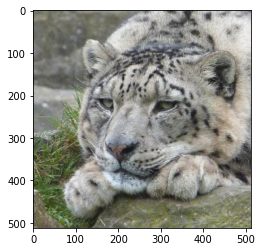

../data/images/3199.jpg


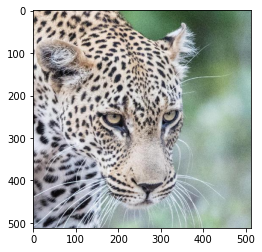

../data/images/2967.jpg


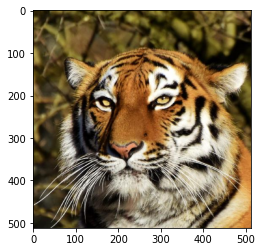

../data/images/1786.jpg


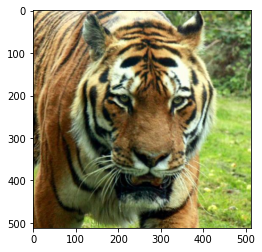

../data/images/4089.jpg


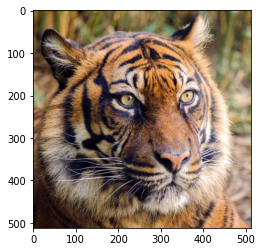

../data/images/770.jpg


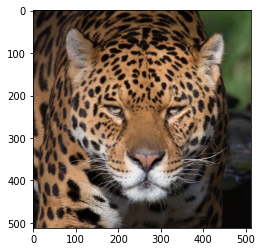

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
encoder = torch_model.ConvEncoder()

# Load the state dict of encoder
encoder.load_state_dict(torch.load(ENCODER_MODEL_PATH, map_location=device))
encoder.eval()
encoder.to(device)

# Loads the embedding
embedding = np.load(EMBEDDING_PATH)

indices_list = compute_similar_images(TEST_IMAGE_PATH, NUM_IMAGES, embedding, device)
plot_similar_images(indices_list)